# **Stance Detection with Natural Language Processing**

Nama: Cindy Pramudita

NIM: 2304220040

Prodi: Statistika dan Sains Data

MK: Prediksi Modern & Machine Learning

Praktisi: Fitria Nur Aida, S.Stat., M.MT.

**Tugas Natural Language Processing**
- aplikasikan sentiment analysis pada data yang sudah didapatkan,
- minimal menggunakan 3 metode NLP,
- output sentiment, word cloud, interpretasi dalam story telling saat presentasi,
- comparing matrix evaluation dari ketiga model nlp,
- buat slide presentasi dengan poin content yang sama seperti tugas sebelumnya, ditambahkan list referensi penelitian, maksimal 15 slide total.

### load dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# load from path gdrive
file_path = '/content/drive/MyDrive/Dataset/Raw_Crawling_MBG_X.txt'

# read .txt
with open(file_path, 'r') as file:
    content = file.read()

print(content)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Raw Tweet Crawling Output

Row 1
Date       : 2025-11-18 23:56:53+00:00
Tweet ID   : 1990932251513618439
Text       : MAKANNN SAYANGG
best menuu after mieee ayam yow
MAKANNN 
SUBAKKK 
#mbg https://t.co/zxthgsatMV
Language   : in
Retweet Count: 0
Reply Count: 0
Like Count : 0
Quote Count: 0
---------------------------------------

Row 2
Date       : 2025-11-18 17:03:22+00:00
Tweet ID   : 1990828187006201982
Text       : #konteksnews Kepala BGN Ungkap Penggunaan Nitrin Tinggi Jadi Penyebab Utama Keracunan MBG

#makanbergizigratis #mbg #badangizinasional #bgn #programpemerintah #dpr #dprri #kesehatananak #gizianak #stunting #giziseimbang #keamananpangan #beritaviral #beritaterkini #beritaindonesia https://t.co/pVgXElxvvY
Language   : in
Retweet Count: 0
Reply Count: 1
Like Count : 0
Quote Count: 0
---------------------------------------

Row 3
Date       : 2025-

### preprocessing and data cleaning

In [2]:
import pandas as pd
import re

# parsing data
# proses mengubah data mentah yang tidak terstruktur atau sulit dibaca menjadi format yang lebih terstruktur
def parse_tweet_content(content_str):
    tweets_data = []
    tweet_blocks = content_str.split('---------------------------------------')

    for block in tweet_blocks[1:]:
        if not block.strip():
            continue

        tweet = {}

        # extract fields
        date_match = re.search(r"Date\s*:\s*(.+)", block)
        tweet_id_match = re.search(r"Tweet ID\s*:\s*(\d+)", block)
        language_match = re.search(r"Language\s*:\s*(\S+)", block)
        retweet_count_match = re.search(r"Retweet Count\s*:\s*(\d+)", block)
        reply_count_match = re.search(r"Reply Count\s*:\s*(\d+)", block)
        like_count_match = re.search(r"Like Count\s*:\s*(\d+)", block)
        quote_count_match = re.search(r"Quote Count\s*:\s*(\d+)", block)

        # extract multiline text
        text_match = re.search(
            r"Text\s*:\s*(.*?)(?=\n(?:Language|Retweet Count|Reply Count|Like Count|Quote Count|$))",
            block,
            re.DOTALL,
        )

        if date_match: tweet['Date'] = date_match.group(1).strip()
        if tweet_id_match: tweet['Tweet ID'] = tweet_id_match.group(1).strip()
        if text_match: tweet['Text'] = text_match.group(1).strip()
        if language_match: tweet['Language'] = language_match.group(1).strip()
        if retweet_count_match: tweet['Retweet Count'] = int(retweet_count_match.group(1))
        if reply_count_match: tweet['Reply Count'] = int(reply_count_match.group(1))
        if like_count_match: tweet['Like Count'] = int(like_count_match.group(1))
        if quote_count_match: tweet['Quote Count'] = int(quote_count_match.group(1))

        tweets_data.append(tweet)

    return pd.DataFrame(tweets_data)

df = parse_tweet_content(content)

In [3]:
# cleaning data

# daftar stopwords indonesia
stopwords_id = set([
    "dan", "di", "yang", "ke", "dari", "untuk", "pada", "dengan", "itu", "ini",
    "sebagai", "karena", "atau", "juga", "ada", "agar", "dalam", "nya", "buat",
    "kita", "kamu", "saya", "aku", "dia", "mereka", "kami", "pun", "ya", "nah",
    "si", "para", "tersebut", "jadi", "bagi"
])

def clean_tweet(x):
    if pd.isna(x):
        return ""

    x = x.lower()

    # remove url
    x = re.sub(r"http\S+|www\S+", "", x)

    # remove mentions, hashtags
    x = re.sub(r"@\S+|#\S+", "", x)

    # remove non-alphanumeric
    x = re.sub(r"[^a-z0-9\s]", " ", x)

    # normalize spacing
    x = re.sub(r"\s+", " ", x).strip()

    # remove stopwords
    words = [w for w in x.split() if w not in stopwords_id]
    x = " ".join(words)

    return x

df["clean_text"] = df["Text"].apply(clean_tweet)

In [4]:
# remove duplicate clean_text column
before = len(df)
df = df.drop_duplicates(subset="clean_text", keep="first").reset_index(drop=True)
after = len(df)

print("before:", before)
print("after :", after)
print("removed:", before - after)

before: 99
after : 69
removed: 30


In [5]:
# data overview
df

,Date,Tweet ID,Text,Language,Retweet Count,Reply Count,Like Count,Quote Count,clean_text
0,2025-11-18 17:03:22+00:00,1990828187006201982,#konteksnews Kepala BGN Ungkap Penggunaan Nitr...,in,0,1,0,0,kepala bgn ungkap penggunaan nitrin tinggi pen...
1,2025-11-18 15:46:18+00:00,1990808795518546193,Program MBG Dorong Pertumbuhan UMKM Tempe dan ...,in,0,0,0,0,program mbg dorong pertumbuhan umkm tempe perm...
2,2025-11-18 15:39:20+00:00,1990807038474006730,"Harta Kekayaan Cucun Ahmad, Wakil Ketua DPR ya...",in,0,0,0,0,harta kekayaan cucun ahmad wakil ketua dpr per...
3,2025-11-18 14:36:42+00:00,1990791277802394082,Polemik MBG makin panas. Ahli gizi yang menyam...,in,2,1,7,0,polemik mbg makin panas ahli gizi menyampaikan...
4,2025-11-18 14:35:23+00:00,1990790947966447998,Presiden @prabowo : Brazil memerlukan 11 tahun...,in,4,0,4,0,presiden brazil memerlukan 11 tahun mencapai 4...
...,...,...,...,...,...,...,...,...,...
64,2025-11-18 01:20:19+00:00,1990590860149600507,Kepala Badan Gizi Nasional (BGN) Dadan Hindaya...,in,0,0,3,0,kepala badan gizi nasional bgn dadan hindayana...
65,2025-11-18 01:19:12+00:00,1990590582063051029,Wabup Deli Serdang Resmikan Dapur SPPG di Ujun...,in,0,0,0,0,wabup deli serdang resmikan dapur sppg ujung r...
66,2025-11-18 01:18:58+00:00,1990590520780075123,Wakil Ketua DPR Cucun Sebut Anak Muda Arogan h...,in,0,0,0,0,wakil ketua dpr cucun sebut anak muda arogan h...
67,2025-11-18 01:12:34+00:00,1990588912621027362,Makan Bergizi Gratis bukan hanya memenuhi gizi...,in,3,3,4,0,makan bergizi gratis bukan hanya memenuhi gizi...


In [6]:
# drop column we don't need
columns_to_drop = ['Date', 'Text', 'Language', 'Retweet Count', 'Reply Count', 'Like Count', 'Quote Count']
df = df.drop(columns=columns_to_drop)

In [7]:
# cek fixed data
df

,Tweet ID,clean_text
0,1990828187006201982,kepala bgn ungkap penggunaan nitrin tinggi pen...
1,1990808795518546193,program mbg dorong pertumbuhan umkm tempe perm...
2,1990807038474006730,harta kekayaan cucun ahmad wakil ketua dpr per...
3,1990791277802394082,polemik mbg makin panas ahli gizi menyampaikan...
4,1990790947966447998,presiden brazil memerlukan 11 tahun mencapai 4...
...,...,...
64,1990590860149600507,kepala badan gizi nasional bgn dadan hindayana...
65,1990590582063051029,wabup deli serdang resmikan dapur sppg ujung r...
66,1990590520780075123,wakil ketua dpr cucun sebut anak muda arogan h...
67,1990588912621027362,makan bergizi gratis bukan hanya memenuhi gizi...


In [8]:
# save and download fixed dataset
import pandas as pd
from google.colab import files

# save the dataframe to a csv file
output_filename = 'tweets_mbg_fixed.csv'
df.to_csv(output_filename, index=False)

# download the file
files.download(output_filename)

print(f"dataset successfully saved as '{output_filename}' and ready for download.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

dataset successfully saved as 'tweets_mbg_fixed.csv' and ready for download.


### natural language processing using stance detection

In [26]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# load sentiment model
model_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Device set to use cpu


In [36]:
# apply sentiment to coloumn "clean_text"
def analyze_sentiment(clean_text):
    if pd.isna(clean_text) or str(clean_text).strip() == "":
        return {"label": "neutral", "score": 0} # treat empty/NaN as neutral or unknown
    result = nlp(str(clean_text))[0]
    return result

sentiments = df["clean_text"].apply(analyze_sentiment)

# mapping sentiment to stance
def sentiment_to_stance(label):
    label = label.lower()

    if label == "positive":
        return "pro"
    elif label == "negative":
        return "kontra"
    else:
        return "netral"

df["sentiment"] = sentiments.apply(lambda x: x["label"])
df["confidence"] = sentiments.apply(lambda x: x["score"])

# final stance label
df["stance"] = df["sentiment"].apply(sentiment_to_stance)

# preview
print(df[["clean_text", "stance", "confidence"]].head())

# save result
df.to_csv("tweets_mbg_stance.csv", index=False)


                                          clean_text  stance  confidence
0  kepala bgn ungkap penggunaan nitrin tinggi pen...  netral    0.973065
1  program mbg dorong pertumbuhan umkm tempe perm...  netral    0.997827
2  harta kekayaan cucun ahmad wakil ketua dpr per...  netral    0.997476
3  polemik mbg makin panas ahli gizi menyampaikan...  kontra    0.996870
4  presiden brazil memerlukan 11 tahun mencapai 4...  netral    0.998925


### visualization

In [33]:
# bar chart
import plotly.express as px

# hitung jumlah per stance
stance_counts = df["stance"].value_counts().reset_index()
stance_counts.columns = ["stance", "count"]

# hitung persentase
total = stance_counts["count"].sum()
stance_counts["percentage"] = (stance_counts["count"] / total * 100).round(2)

# gabungkan text jumlah + persentase
stance_counts["label_text"] = stance_counts["count"].astype(str) + " (" + stance_counts["percentage"].astype(str) + "%)"

# urutan kategori
order = ["pro", "netral", "kontra"]

# custom color mapping
color_map = {
    "pro": "green",
    "kontra": "red",
    "netral": "gray"
}

# plot bar chart
fig = px.bar(
    stance_counts,
    x="stance",
    y="count",
    text="label_text",
    category_orders={"stance": order},
    color="stance",
    color_discrete_map=color_map,
    title="Distribusi Stance Tweet terhadap Program MBG"
)

fig.update_traces(textposition="outside")

fig.update_layout(
    xaxis_title="Stance",
    yaxis_title="Jumlah Tweet",
    uniformtext_minsize=10,
    uniformtext_mode='hide',
    showlegend=False
)

fig.show()

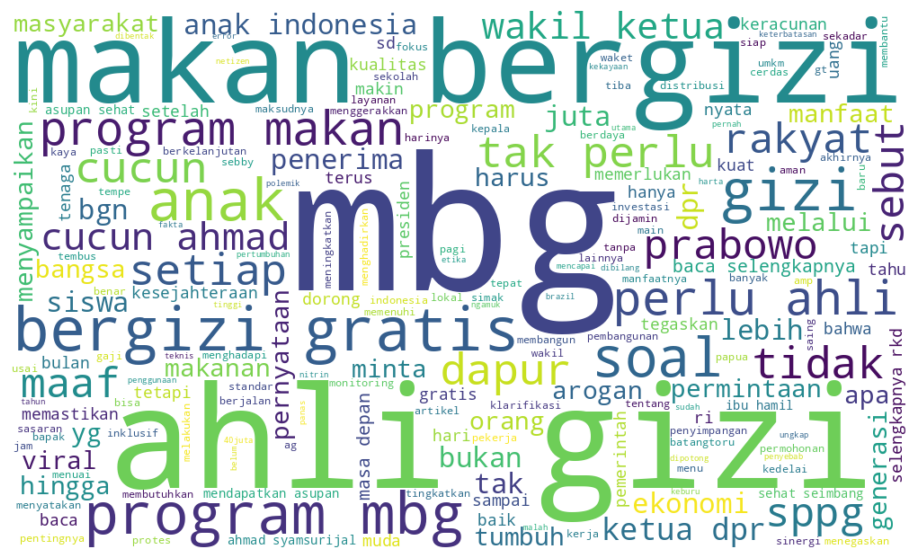

In [34]:
# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = " ".join(df["clean_text"])

wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_words)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### conclusion

**Kesimpulan Praktikum: Stance Detection Isu MBG di Twitter**

Pada praktik ini, dilakukan analisis stance detection terhadap opini publik terkait program Makan Bergizi Gratis (MBG) menggunakan data Twitter hasil crawling. Data mentah berupa teks semi-terstruktur berhasil diubah menjadi dataset terstruktur melalui proses parsing, pembersihan teks, penghapusan duplikasi berbasis isi, dan normalisasi bahasa.

Setelah preprocessing, analisis sentimen dilakukan menggunakan model Indonesian RoBERTa Sentiment Classifier, lalu hasilnya dipetakan ke dalam bentuk stance:

pro → mendukung

kontra → menolak

netral → tidak condong ke dua sisi


Hasil menunjukkan bahwa mayoritas opini publik berada pada kategori netral, disusul oleh kelompok pro dan kontra dalam proporsi lebih kecil. Ini mengindikasikan bahwa sebagian besar percakapan seputar MBG di Twitter cenderung informatif, deskriptif, atau sekadar berbagi berita, bukan ekspresi sikap emosional atau politis yang kuat.

Kelompok pro umumnya terkait dengan narasi manfaat program, dampak sosial, dan harapan terhadap perbaikan gizi anak. Sementara itu, kelompok kontra muncul melalui kritik terhadap implementasi, kekhawatiran pendanaan, atau isu pengawasan. Namun secara umum, intensitas sentimen negatif tidak mendominasi diskursus.

Dengan demikian, dapat disimpulkan bahwa isu MBG masih berada pada fase wacana terbuka, di mana publik lebih banyak membicarakan dan mengamati, daripada mengambil posisi keras. Ini menunjukkan peluang strategis bagi pemerintah atau pemangku kebijakan untuk memperkuat edukasi publik dan transparansi implementasi sebelum sentimen mengkristal menjadi konflik opini.
